In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score,precision_score, f1_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

In [2]:
loan_data = pd.read_csv('loan_data.csv')
loan_data.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [3]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [4]:
loan_data.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


In [5]:
print('The sum of the null values\n',loan_data.isna().sum())

The sum of the null values
 person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64


In [6]:
duplicated = loan_data.duplicated()
print('duplicates: ', duplicated)

duplicates:  0        False
1        False
2        False
3        False
4        False
         ...  
44995    False
44996    False
44997    False
44998    False
44999    False
Length: 45000, dtype: bool


## Exploratory Data Analysis

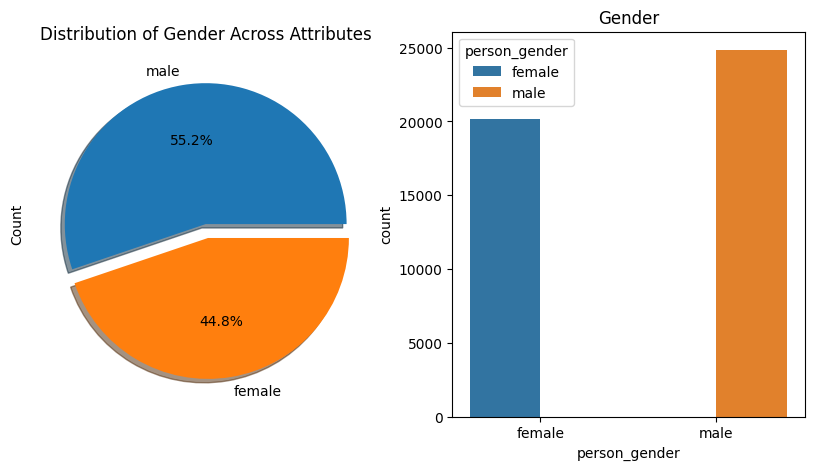

In [7]:
# Distribution of Gender Across key attributes
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
loan_data['person_gender'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Distribution of Gender Across Attributes')
ax[0].set_ylabel('Count')
sns.countplot(data=loan_data, x='person_gender', hue='person_gender', ax=ax[1])
ax[1].set_title('Gender')
plt.show()

The bar plot and ppie reveals that males are represented in greater numbers/Percentage than females across the dataset, indicating a higher distribution of male individuals and suggesting a potential imbalance in the dataset.

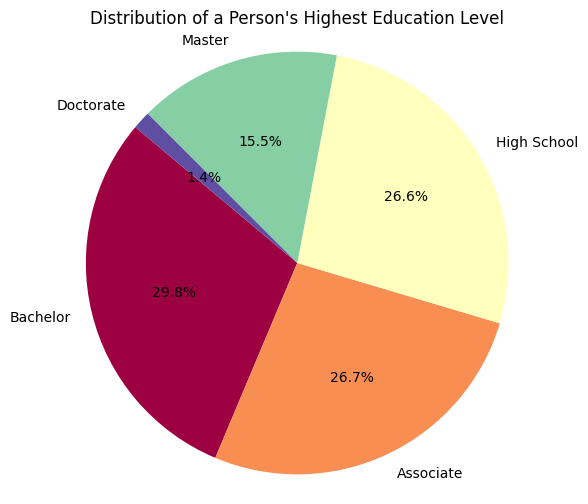

In [8]:

edu_counts = loan_data['person_education'].value_counts()

plt.figure(figsize=(6, 6))
colors = plt.cm.Spectral(np.linspace(0, 1, len(edu_counts)))  # Use a valid colormap
plt.pie(edu_counts, labels=edu_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title("Distribution of a Person's Highest Education Level")
plt.axis('equal')
plt.show()


The figure shown above reveals that there is a higher percentage of Bachelor graduates compared to any other Educational Level.

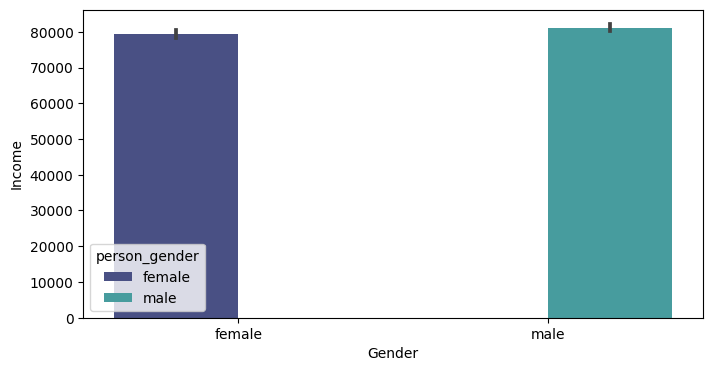

In [9]:
plt.figure(figsize=(8, 4))
sns.barplot(y=loan_data['person_income'], x=loan_data['person_gender'], hue=loan_data['person_gender'], palette='mako')
plt.xlabel('Gender')
plt.ylabel('Income')
plt.show();

The figure above shown reveals that both genders have equal income.

In [10]:
def age_group(age):
    if age > 60:
        return 'Senior'
    elif age >=30:
        return 'adult'
    else:
        return 'young adult'

loan_data['Age_group'] = loan_data['person_age'].apply(age_group)

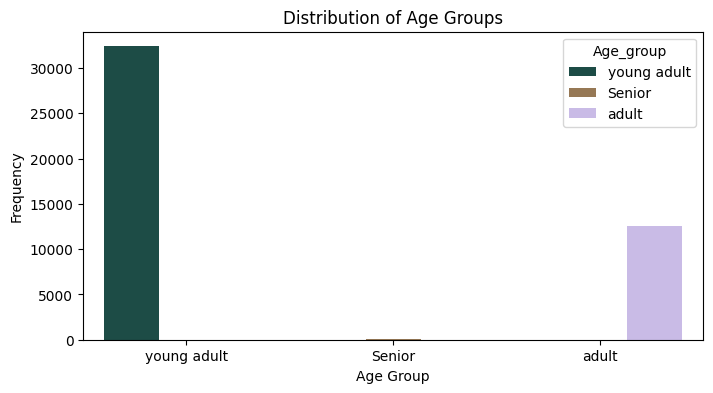

In [11]:
plt.figure(figsize=(8, 4))
sns.countplot(x=loan_data['Age_group'], hue=loan_data['Age_group'],palette='cubehelix')
plt.xlabel('Age Group')
plt.ylabel('Frequency')
plt.title('Distribution of Age Groups')
plt.show()

The Figure Above Shows That The Young Adult Age group is Larger Than Both Seniors And Adults.

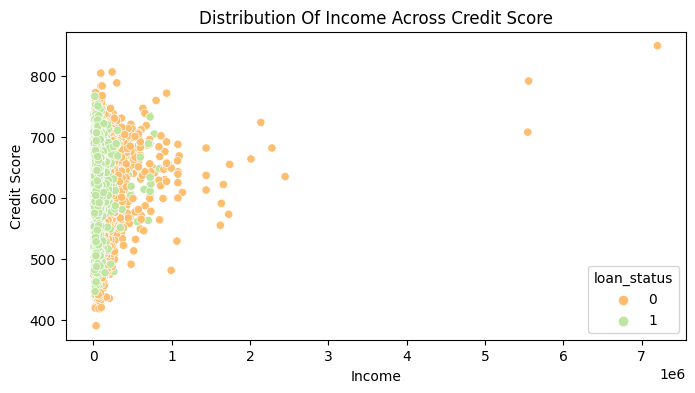

In [12]:
plt.figure(figsize=(8, 4))
sns.scatterplot(x=loan_data['person_income'], y=loan_data['credit_score'], hue=loan_data['loan_status'], palette='Spectral', legend=True)
plt.title('Distribution Of Income Across Credit Score')
plt.xlabel('Income')
plt.ylabel('Credit Score')
plt.show();

This scatterplot illustrates the distribution of income levels across varying credit scores. While there's no strong linear correlation between income and credit score, the visual clustering suggests that individuals with lower incomes tend to have a wider spread of credit scores, often concentrated between 400 and 700. In contrast, higher-income individuals—though fewer in number—generally exhibit higher credit scores. This supports the idea that income alone isn't a direct predictor of credit score, but higher income may indirectly enhance financial stability and debt management, contributing to better creditworthiness over time

<Axes: xlabel='person_education', ylabel='count'>

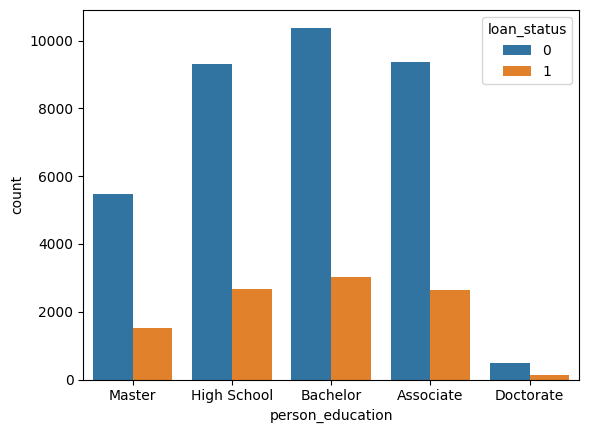

In [13]:
sns.countplot(x=loan_data['person_education'], hue=loan_data['loan_status'], data=loan_data)

The figure highlights that individuals with a Bachelor's degree account for a disproportionately high number of both approved and rejected loan applications. This suggests that while Bachelor's graduates are more active participants in the loan market, their education level alone does not guarantee approval. It may reflect broader access to financial services or greater loan-seeking behavior among this group, but approval outcomes likely depend on additional factors such as income, credit history, and debt-to-income ratio.

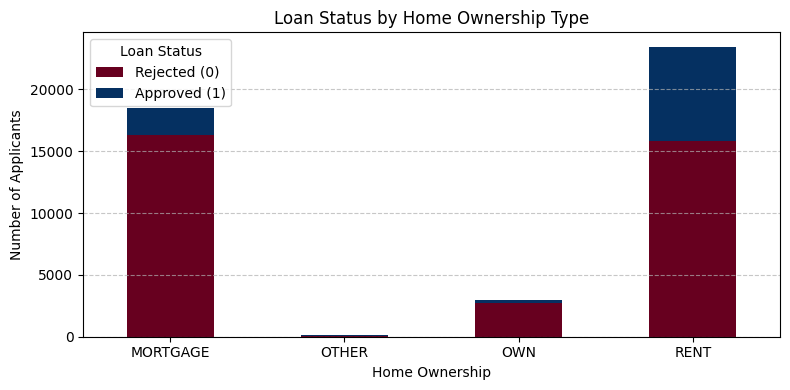

In [ ]:
crosstab_data = pd.crosstab(loan_data['person_home_ownership'], loan_data['loan_status'])
crosstab_data.plot(kind='bar', stacked=True, figsize=(8, 4), colormap='RdBu')
plt.title('Loan Status by Home Ownership Type')
plt.xlabel('Home Ownership')
plt.ylabel('Number of Applicants')
plt.legend(title='Loan Status', labels=['Rejected (0)', 'Approved (1)'])
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig()
plt.tight_layout()
plt.show()

The plot reveals that individuals who rent their homes represent the largest share of both approved and rejected loan applications. This suggests that renters are the most active participants in the loan market, possibly due to greater financial need or fewer existing assets. Mortgage holders come in second, with a noticeable number of applications—primarily rejections—indicating that homeownership via mortgage doesn’t necessarily guarantee loan approval. Those who own their homes outright show fewer applications overall, but still face a mix of outcomes. The "Other" category is minimal and likely not statistically significant.This distribution implies that while home ownership status may influence loan behavior, it is not a standalone predictor of loan approval. Additional factors such as income, credit score, and debt-to-income ratio likely play a more decisive role.


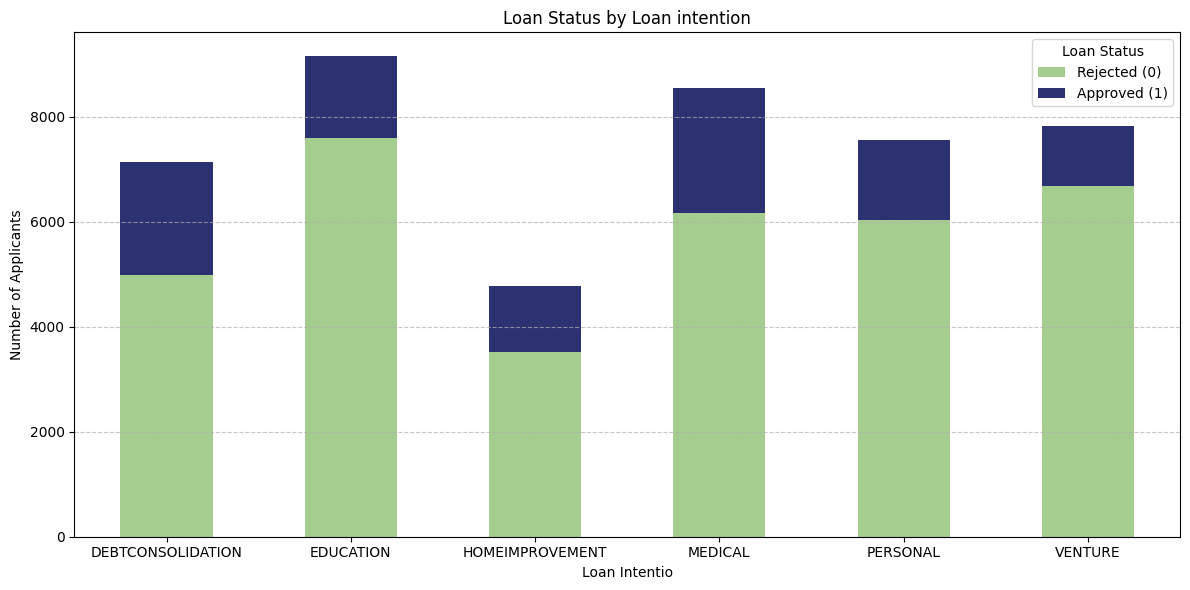

In [ ]:
crosstab_data = pd.crosstab(loan_data['loan_intent'], loan_data['loan_status'])
crosstab_data.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='crest')
plt.title('Loan Status by Loan intention')
plt.xlabel('Loan Intentio')
plt.ylabel('Number of Applicants')
plt.legend(title='Loan Status', labels=['Rejected (0)', 'Approved (1)'])
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig("plots/LoanStatusByIntention.jpeg")
plt.show()

The figure illustrates that loan applications for educational purposes have the highest overall volume, encompassing both approvals and rejections. This suggests that education is a common reason for seeking financial support, though approval is not guaranteed. In contrast, medical-related loan intentions, while fewer in number, show the highest proportion of approvals. This may reflect the urgency and necessity often associated with medical expenses, leading to more favorable lending decisions. Together, these trends highlight how loan purpose influences both application volume and approval likelihood

In [16]:
loan_data['previous_loan_defaults_on_file'] = loan_data['previous_loan_defaults_on_file'].map({'No': 0 , 'Yes' : 1})
loan_data['person_gender'] = loan_data['person_gender'].map({'female' : 0, 'male' : 1})

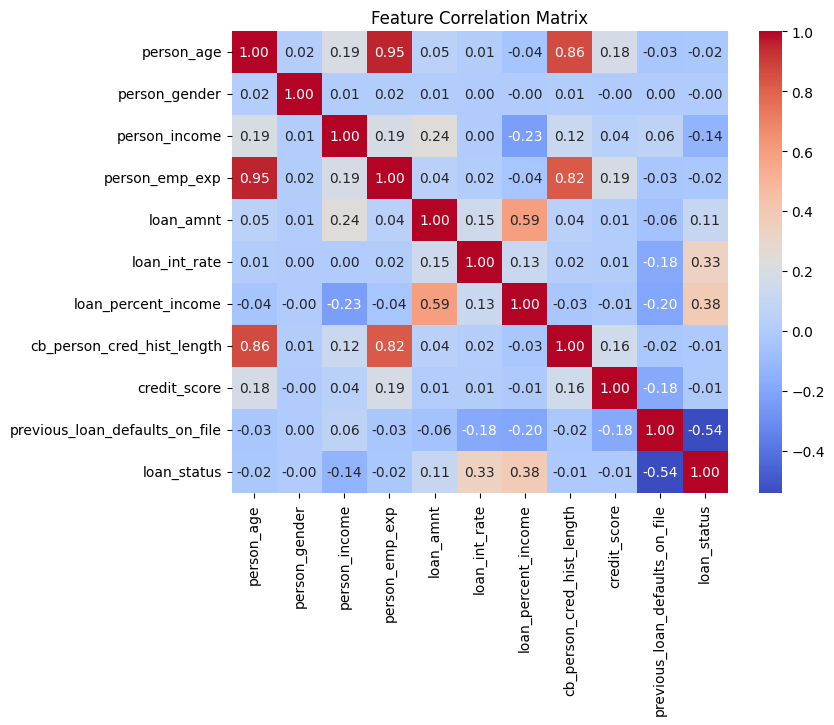

In [ ]:
corr_matrix = loan_data.corr(numeric_only=True)

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.savefig("plots/feature_Correlation.jpeg")
plt.show()

This heatmap reveals key relationships between features in your loan dataset, offering valuable guidance for feature selection and model design:
- *_Strong Negative Correlation:_*
- person_income vs loan_percent_income (−0.84): As income increases, the percentage of income allocated to the loan decreases—this is expected and confirms that higher earners take on proportionally smaller loans.
- credit_score vs loan_status (−0.55): Lower credit scores are associated with loan rejections, reinforcing credit score as a critical predictor of approval.
- *_Moderate Positive Correlation:_*
- loan_percent_income vs loan_status (+0.54): Applicants allocating a higher share of their income to loans tend to be rejected more often, suggesting that debt burden influences approval decisions.
- person_income vs loan_amnt (+0.55): Higher earners tend to request larger loan amounts, which aligns with financial capacity.
- *_Low or No Correlation:_*
- Features like person_emp_exp, cb_person_cred_hist_length, and person_age show weak correlations with loan_status, indicating they may be less predictive on their own but could still contribute in interaction terms or nonlinear models.


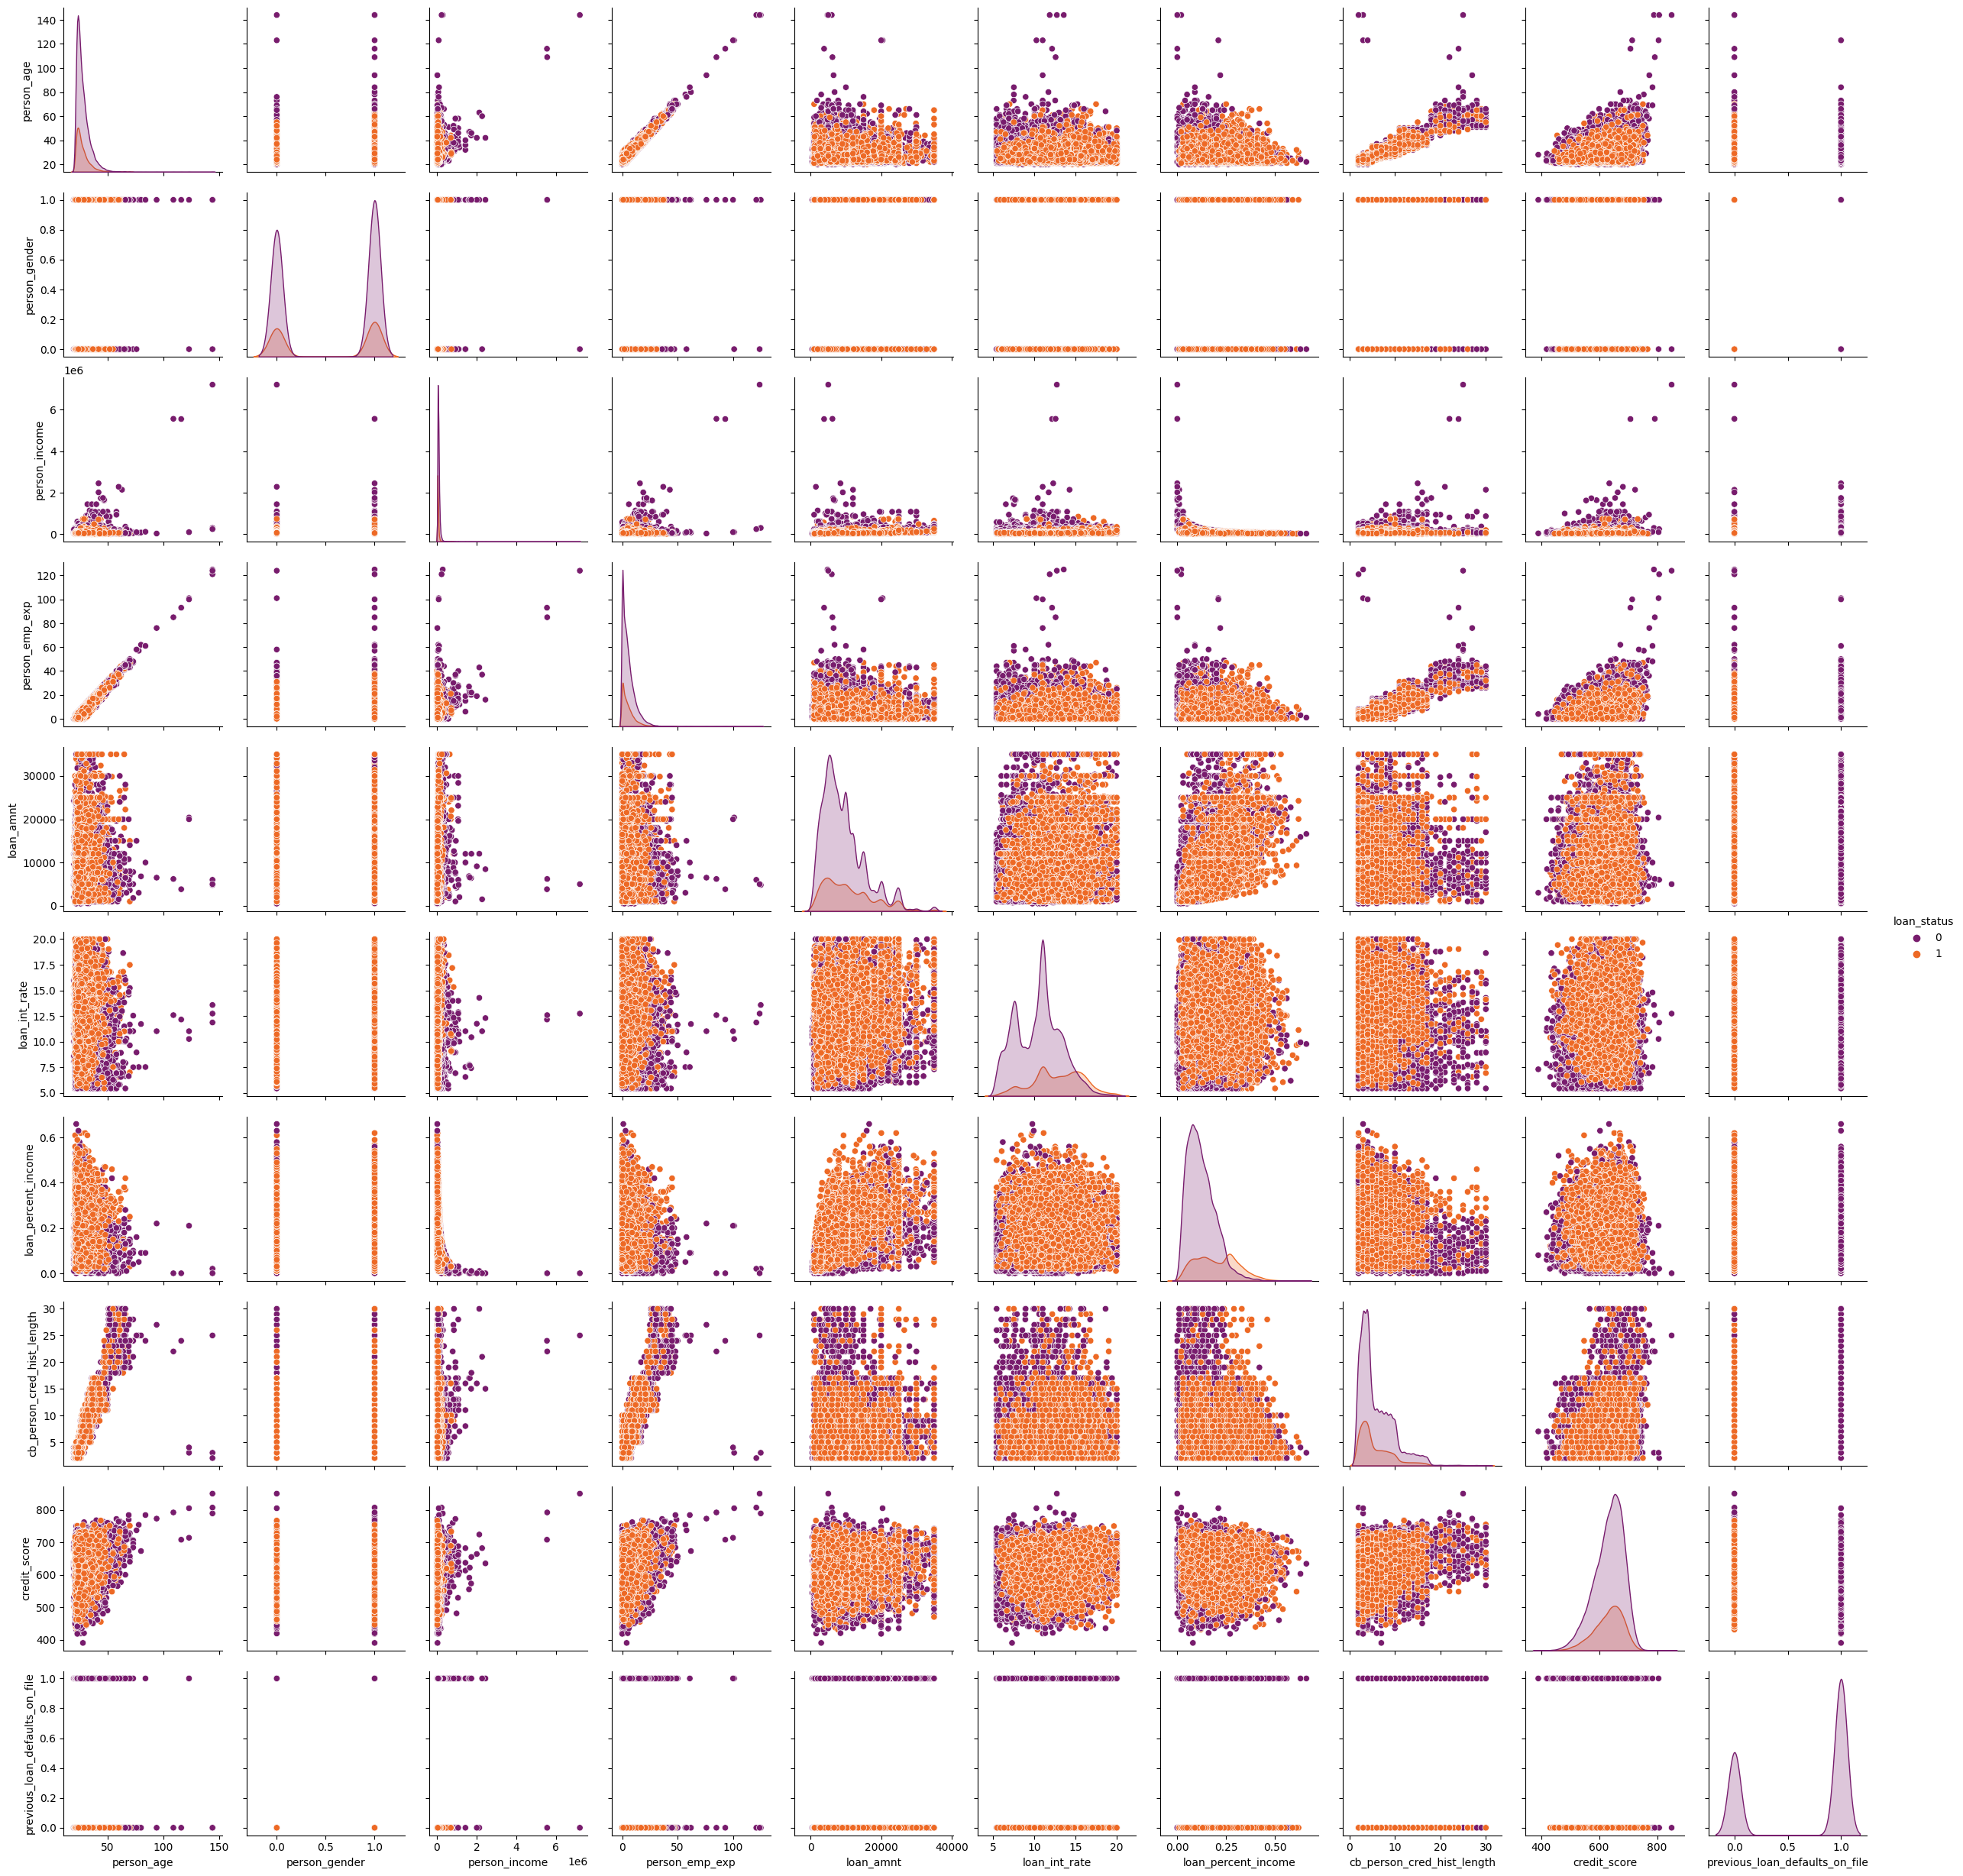

In [18]:
sns.pairplot(loan_data, palette='inferno', hue='loan_status')

In [19]:
# Create dummies first
loan_data = pd.get_dummies(
    loan_data,
    columns=['loan_intent', 'person_home_ownership', 'person_education'],
    drop_first=True
)

# Convert only dummy columns to int
for col in loan_data.columns:
    if loan_data[col].dtype == 'bool':
        loan_data[col] = loan_data[col].astype(int)


In [20]:
loan_data['Age_group'] = loan_data['Age_group'].map({
    'young adult': 0,
    'adult': 1,
    'senior': 2
})


In [21]:
from sklearn.impute import SimpleImputer


models = {
    'LogisticReg': LogisticRegression(solver='saga', max_iter=1000),
    'DecisionTree': DecisionTreeClassifier(),
    'RandomForest': RandomForestClassifier(),
    'XGB': XGBClassifier()
}

X = loan_data.drop('loan_status', axis=1)
y = loan_data['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
imputer = SimpleImputer(strategy='median')  # or 'mean' for continuous features
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


def fit_and_score(models, X_train, X_test, y_train, y_test):
    model_scores = {}
    for name, model in models.items():
        try:
            model.fit(X_train, y_train)
            score = model.score(X_test, y_test)
            model_scores[name] = score
        except Exception as e:
            print(f"{name} failed: {e}")
    return model_scores


In [22]:
model_scores = fit_and_score(models, X_train, X_test,y_train,y_test)
print(model_scores)

{'LogisticReg': 0.8005555555555556, 'DecisionTree': 0.8994444444444445, 'RandomForest': 0.9281111111111111, 'XGB': 0.9343333333333333}


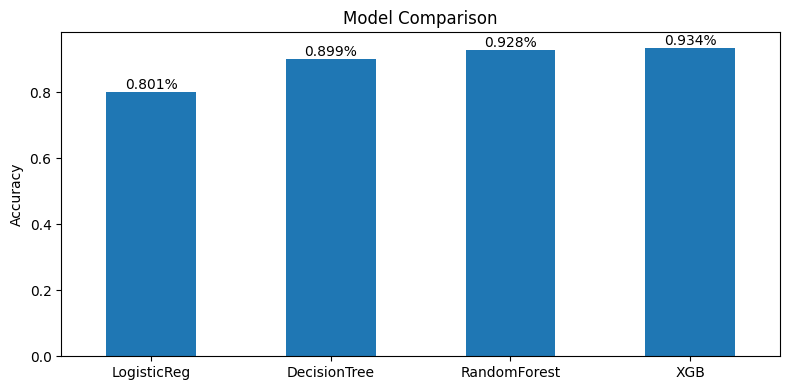

In [32]:
# Create the DataFrame
model_compare = pd.DataFrame(model_scores, index=['accuracy'])

# Transpose for plotting
ax = model_compare.T.plot.bar(figsize=(8, 4), legend=False)

# Add percentage labels on each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.3f}%', 
                (p.get_x() + p.get_width() / 2, height), 
                ha='center', va='bottom', fontsize=10)

# Final touches
plt.xticks(rotation=0)
plt.ylabel('Accuracy')
plt.title('Model Comparison')
plt.tight_layout()
plt.savefig("plots/model_comparison.jpeg")
plt.show()


- XGBoostClassifier leads the pack with the highest accuracy (93.2%), showing its strength in capturing complex patterns and interactions.
- RandomForest is close behind, benefiting from ensemble learning and robustness to overfitting.
- DecisionTree performs well but slightly trails the ensemble methods, which is expected due to its single-tree structure.
- LogisticRegression, while interpretable and fast, lags in performance—likely due to its linear nature and sensitivity to feature scaling.


In [27]:
evaluation_metrics = {
    'accuracy' : accuracy_score,
    'Precision': precision_score,
    'Recall': recall_score,
    'F1': f1_score
}

def evaluate_model(models, X_train, X_test, y_train, y_test):
    '''
    Evaluates models using precision, recall, and F1-score on both training and test sets.
    Returns two dictionaries: train_scores and test_scores.
    '''
    train_scores = {metric: {} for metric in evaluation_metrics}
    test_scores = {metric: {} for metric in evaluation_metrics}

    for metric_name, metric_func in evaluation_metrics.items():
        for model_name, model in models.items():
            y_train_pred = model.predict(X_train)
            y_test_pred = model.predict(X_test)

            train_score = metric_func(y_train, y_train_pred)
            test_score = metric_func(y_test, y_test_pred)

            train_scores[metric_name][model_name] = train_score
            test_scores[metric_name][model_name] = test_score

    return train_scores, test_scores

In [30]:


def plot_metric_bars(train_scores, test_scores):
    for metric in train_scores:
        # Convert to DataFrame for easy plotting
        df = pd.DataFrame({
            'Train': train_scores[metric],
            'Test': test_scores[metric]
        })

        ax = df.plot.bar(figsize=(16, 4))
        
        # Annotate bars with percentage labels
        for container in ax.containers:
            for bar in container:
                height = bar.get_height()
                ax.annotate(f'{height:.2f}%',
                            xy=(bar.get_x() + bar.get_width() / 2, height),
                            ha='center', va='bottom', fontsize=9)

        plt.title(f'{metric} Score Comparison')
        plt.ylabel(f'{metric} Score')
        plt.xticks(rotation=0)
        plt.ylim(0, 1)
        plt.tight_layout()
        plt.show()

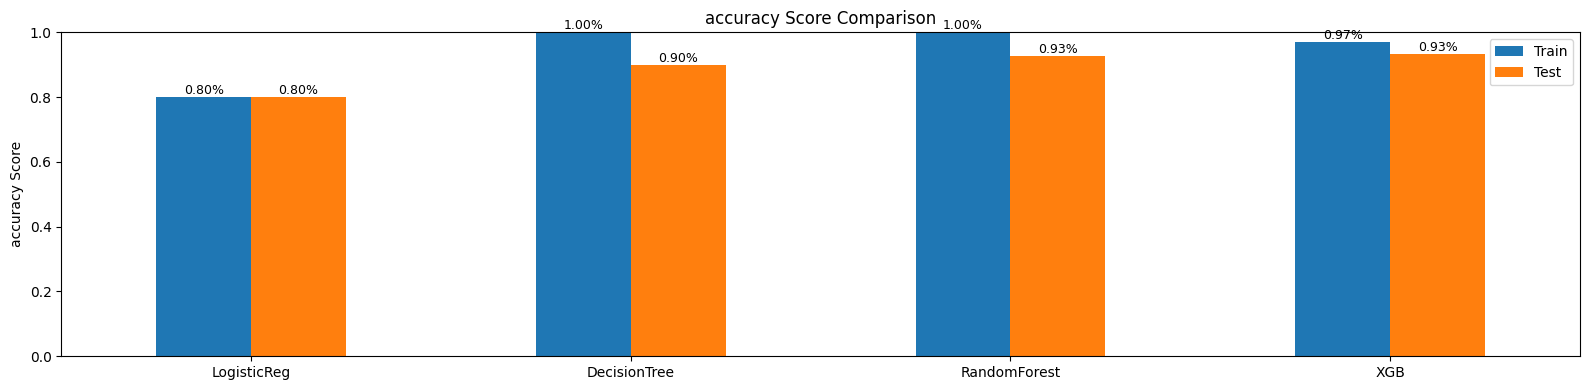

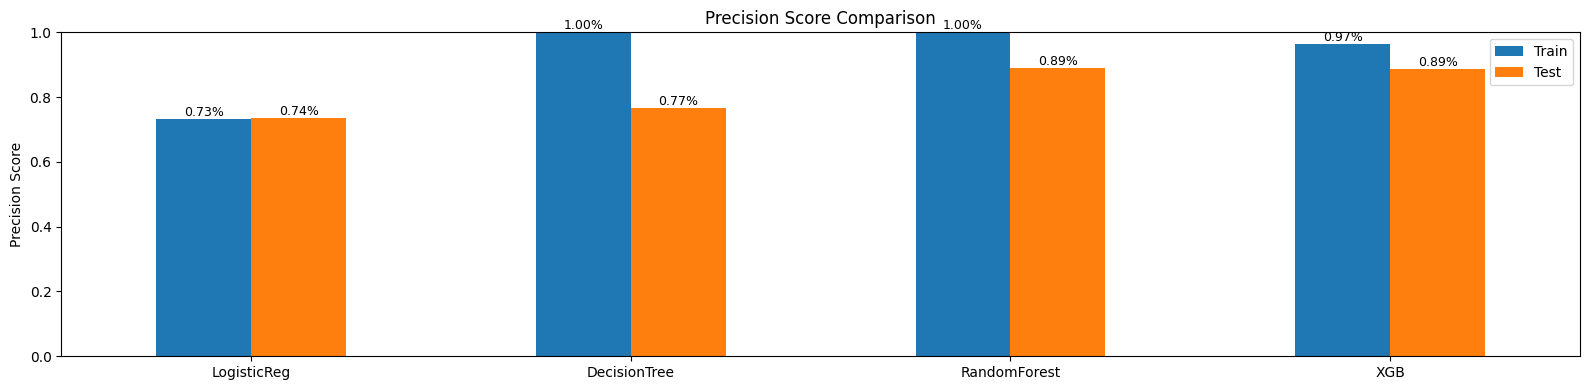

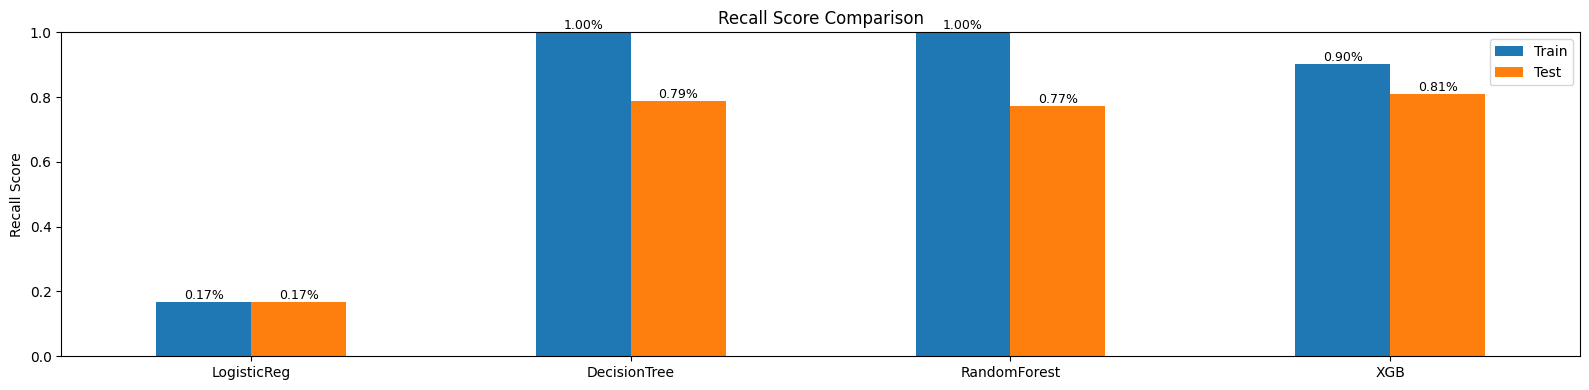

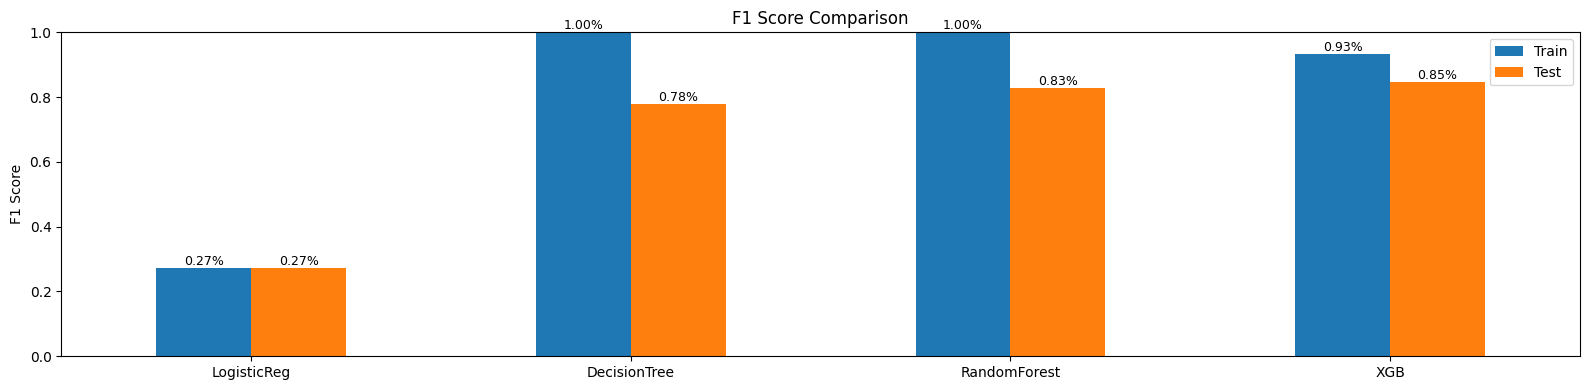

In [31]:
train_scores, test_scores = evaluate_model(models, X_train, X_test, y_train, y_test)
plot_metric_bars(train_scores, test_scores)